This notebook is intended to be run after the vectorisation notebook. In the previous step, we transformed the textual data into numerical vectors using the TF-IDF technique and saved the resulting matrix along with the processed DataFrame.

# Import necessary libraries

In [24]:
import h5py
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


# Load the Data

In [15]:
# Load the TF-IDF matrix
with h5py.File('../data/vectorised/tfidf_vectorised_data.h5', 'r') as f:
    X_tfidf = f['X_tfidf'][:]

# Load the DataFrame
df = pd.read_hdf('../data/vectorised/vectorised_data_df.h5', key='df')

print("Vectorised data loaded successfully.")

Vectorised data loaded successfully.


In [5]:
df.head()

,title,text,label,combined_text,cleaned_text,text_length,log_text_length
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,law enforcement high alert following threats c...,3311,8.105308
1,No Title,Did they post their votes for Hillary already?,1,No Title Did they post their votes for Hillary...,title post vote hillary already,31,3.465736
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,unbelievable obamas attorney general says char...,277,5.627621
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",bobby jindal raised hindu us story christian c...,5611,8.632662
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,satan russia unvelis image terrifying new supe...,1388,7.236339


In [16]:
print(X_tfidf)
print("====================================")
print(X_tfidf.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(72095, 24016)


In [17]:
# Display the first few rows to verify the new features
df.head()


,title,text,label,combined_text,cleaned_text,text_length,log_text_length
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,law enforcement high alert following threats c...,3311,8.105308
1,No Title,Did they post their votes for Hillary already?,1,No Title Did they post their votes for Hillary...,title post vote hillary already,31,3.465736
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,unbelievable obamas attorney general says char...,277,5.627621
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",bobby jindal raised hindu us story christian c...,5611,8.632662
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,satan russia unvelis image terrifying new supe...,1388,7.236339


# Combining the Vectors

In [18]:
# Combine TF-IDF Vectors with the New Features

# Convert the DataFrame of new features to a NumPy array
additional_features = df[['log_text_length']].values  # Add other feature columns as needed

# Combine the TF-IDF matrix with the new features
import numpy as np
X_combined = np.hstack([X_tfidf, additional_features])

print(f"Combined feature matrix shape: {X_combined.shape}")

Combined feature matrix shape: (72095, 24017)


# Inspecting the Combined Matrix

In [19]:
# Print the first row to inspect the values
print("First row of the combined feature matrix:\n", X_combined[0])

# Check the last few columns (where additional features are likely to be)
print("Last few columns of the first row (should include log_text_length):\n", X_combined[0, -5:])

First row of the combined feature matrix:
 [0.         0.         0.         ... 0.         0.         8.10530752]
Last few columns of the first row (should include log_text_length):
 [0.         0.         0.         0.         8.10530752]


In [20]:
# Print the last column of the first few rows to verify the `log_text_length` values
print("log_text_length values (from the combined matrix):\n", X_combined[:5, -1])

# Print the original `log_text_length` values from the DataFrame for comparison
print("log_text_length values (from the DataFrame):\n", df['log_text_length'].head())


log_text_length values (from the combined matrix):
 [8.10530752 3.4657359  5.62762111 8.63266244 7.23633934]
log_text_length values (from the DataFrame):
 0    8.105308
1    3.465736
2    5.627621
3    8.632662
4    7.236339
Name: log_text_length, dtype: float64


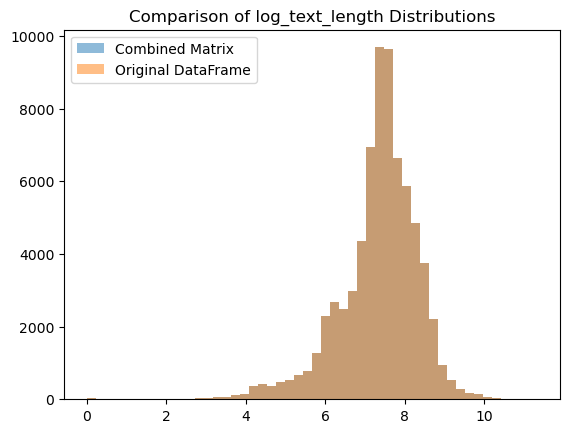

In [23]:
# Compare distributions
# Extract the log_text_length from the combined matrix
log_text_length_combined = X_combined[:, -1]

plt.hist(log_text_length_combined, bins=50, alpha=0.5, label='Combined Matrix')
plt.hist(df['log_text_length'], bins=50, alpha=0.5, label='Original DataFrame')
plt.legend()
plt.title('Comparison of log_text_length Distributions')
plt.show()


# Data Splitting

In [25]:
y = df['label'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (57676, 24017)
Testing set shape: (14419, 24017)


In [26]:
# Create the directory if it doesn't exist
os.makedirs('../data/splits', exist_ok=True)

# Save the split datasets
with h5py.File('../data/splits/train_test_split.h5', 'w') as f:
    f.create_dataset('X_train', data=X_train)
    f.create_dataset('X_test', data=X_test)
    f.create_dataset('y_train', data=y_train)
    f.create_dataset('y_test', data=y_test)

print("Training and testing sets saved successfully.")

Training and testing sets saved successfully.
